In [ ]:
cd ..

In [69]:
import ast
import pandas as pd
from utils.genre_classification import get_top_genre_id
from matplotlib import pyplot as plt

In [70]:
metadata = pd.read_csv('fma_metadata/raw_tracks.csv')[['track_id', 'track_genres']]
metadata.dropna(inplace=True)
# Каждая песня имеет в среднем 2 - 3 жанра. Возьмем только нулевой элемент # Проверить мультикласс
metadata['first_genre'] = metadata['track_genres'].apply(lambda x: ast.literal_eval(x)[0]['genre_id'])
metadata['first_genre'] = metadata['track_genres'].apply(lambda x: ast.literal_eval(x)[0]['genre_id'])

# Загружаем датасет жанров
genres = pd.read_csv('fma_metadata/genres.csv')

# По нулевому элементу найдем его рута
metadata['genre_id'] = metadata['first_genre'].apply(lambda genre_id: get_top_genre_id(genres, int(genre_id)))


metadata = metadata[['track_id', 'genre_id']]

top_genres = genres[genres['parent'] == 0]
top_genres

,genre_id,#tracks,parent,title,top_level
1,2,5271,0,International,2
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
7,8,868,0,Old-Time / Historic,8
8,9,1987,0,Country,9
9,10,13845,0,Pop,10
11,12,32923,0,Rock,12
12,13,730,0,Easy Listening,13
13,14,1499,0,Soul-RnB,14


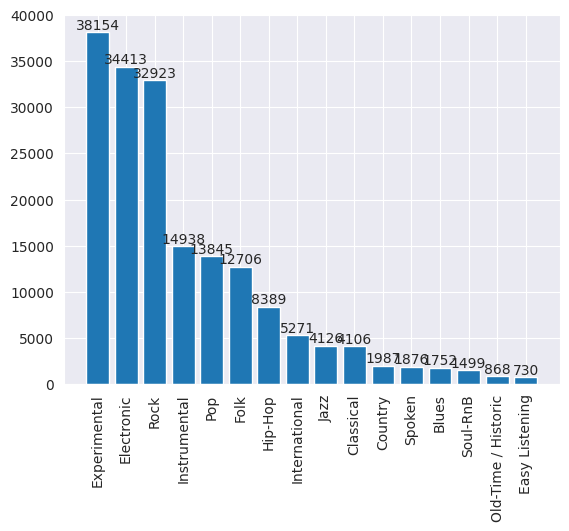

In [71]:
top_genres_sorted = top_genres.sort_values('#tracks', ascending=False)

fig, ax = plt.subplots()
ax.bar(top_genres_sorted.title, top_genres_sorted['#tracks'])

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

Выберем популярные жанры

In [72]:
filtered_genres = genres[genres['title'].isin(['Electronic', 'Rock', 'Pop', 'Classical', 'Hip-Hop', 'Jazz', 'Folk', 'Blues'])]
filtered_genres

,genre_id,#tracks,parent,title,top_level
2,3,1752,0,Blues,3
3,4,4126,0,Jazz,4
4,5,4106,0,Classical,5
9,10,13845,0,Pop,10
11,12,32923,0,Rock,12
14,15,34413,0,Electronic,15
16,17,12706,0,Folk,17
20,21,8389,0,Hip-Hop,21


In [73]:
metadata

,track_id,genre_id
0,2,21
1,3,21
2,5,21
3,10,10
4,20,10
...,...,...
109722,155316,12
109723,155317,12
109724,155318,12
109725,155319,12


In [74]:
merged_df = pd.merge(metadata, filtered_genres, on='genre_id', how='inner')[['track_id', 'genre_id', 'title']]
merged_df

,track_id,genre_id,title
0,2,21,Hip-Hop
1,3,21,Hip-Hop
2,5,21,Hip-Hop
3,134,21,Hip-Hop
4,583,21,Hip-Hop
...,...,...,...
72877,155115,5,Classical
72878,155119,5,Classical
72879,155204,5,Classical
72880,155205,5,Classical


Посмотрим сколько каждого жанра осталось треков (помним, что берем только 1 жанр из массива, поэтому сильно меньше некоторых жанров)

In [75]:
merged_df.groupby('genre_id').count()['track_id']

genre_id
3      1717
4      2329
5      2106
10     8430
12    22036
15    25371
17     6274
21     4619
Name: track_id, dtype: int64

Минимум 1717, для баланса жанров берем по 1717 каждого жанра

In [76]:
resulting_df = merged_df.groupby('genre_id').apply(lambda x: x.sample(1717, random_state = 111)).reset_index(drop=True)
resulting_df

,track_id,genre_id,title
0,3430,3,Blues
1,105091,3,Blues
2,59337,3,Blues
3,129434,3,Blues
4,40055,3,Blues
...,...,...,...
13731,22295,21,Hip-Hop
13732,112477,21,Hip-Hop
13733,53074,21,Hip-Hop
13734,55170,21,Hip-Hop


In [77]:
resulting_df.to_csv('genre_classification_metadata.csv', index=False)

In [78]:
print(
    resulting_df['track_id'].count(),
    resulting_df['track_id'].nunique()
)

13736 13736


Видим что в датасете track_id - первичный ключ

In [79]:
id_to_genre = {str(k): v for k, v in resulting_df.set_index('track_id').to_dict()['title'].items()}
id_to_genre

{'3430': 'Blues',
 '105091': 'Blues',
 '59337': 'Blues',
 '129434': 'Blues',
 '40055': 'Blues',
 '70552': 'Blues',
 '44997': 'Blues',
 '125217': 'Blues',
 '107467': 'Blues',
 '49734': 'Blues',
 '46464': 'Blues',
 '3424': 'Blues',
 '104591': 'Blues',
 '66010': 'Blues',
 '4539': 'Blues',
 '83726': 'Blues',
 '53143': 'Blues',
 '123948': 'Blues',
 '143782': 'Blues',
 '39931': 'Blues',
 '92230': 'Blues',
 '96132': 'Blues',
 '74677': 'Blues',
 '113207': 'Blues',
 '140193': 'Blues',
 '100488': 'Blues',
 '90180': 'Blues',
 '45382': 'Blues',
 '100494': 'Blues',
 '125207': 'Blues',
 '113579': 'Blues',
 '48073': 'Blues',
 '45262': 'Blues',
 '48082': 'Blues',
 '81471': 'Blues',
 '92837': 'Blues',
 '96886': 'Blues',
 '60769': 'Blues',
 '114985': 'Blues',
 '86706': 'Blues',
 '79535': 'Blues',
 '50888': 'Blues',
 '104598': 'Blues',
 '70550': 'Blues',
 '44444': 'Blues',
 '90035': 'Blues',
 '54349': 'Blues',
 '87686': 'Blues',
 '124256': 'Blues',
 '42380': 'Blues',
 '66098': 'Blues',
 '38539': 'Blues',

In [80]:
metadata2 = pd.read_csv('./genre_classification_metadata.csv')

# Создаем словарь маппер id песни - топ жанр
id_to_genre = {str(k): v for k, v in metadata2.set_index('track_id').to_dict()['title'].items()}

In [81]:
id_to_genre

{'3430': 'Blues',
 '105091': 'Blues',
 '59337': 'Blues',
 '129434': 'Blues',
 '40055': 'Blues',
 '70552': 'Blues',
 '44997': 'Blues',
 '125217': 'Blues',
 '107467': 'Blues',
 '49734': 'Blues',
 '46464': 'Blues',
 '3424': 'Blues',
 '104591': 'Blues',
 '66010': 'Blues',
 '4539': 'Blues',
 '83726': 'Blues',
 '53143': 'Blues',
 '123948': 'Blues',
 '143782': 'Blues',
 '39931': 'Blues',
 '92230': 'Blues',
 '96132': 'Blues',
 '74677': 'Blues',
 '113207': 'Blues',
 '140193': 'Blues',
 '100488': 'Blues',
 '90180': 'Blues',
 '45382': 'Blues',
 '100494': 'Blues',
 '125207': 'Blues',
 '113579': 'Blues',
 '48073': 'Blues',
 '45262': 'Blues',
 '48082': 'Blues',
 '81471': 'Blues',
 '92837': 'Blues',
 '96886': 'Blues',
 '60769': 'Blues',
 '114985': 'Blues',
 '86706': 'Blues',
 '79535': 'Blues',
 '50888': 'Blues',
 '104598': 'Blues',
 '70550': 'Blues',
 '44444': 'Blues',
 '90035': 'Blues',
 '54349': 'Blues',
 '87686': 'Blues',
 '124256': 'Blues',
 '42380': 'Blues',
 '66098': 'Blues',
 '38539': 'Blues',